# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from model import EvacuationModel

%matplotlib inline
plt.style.use('default')

# Run simulation and get agent and model data

In [ ]:
# Cell 2: Run Simulation and Get Data
def run_evacuation_simulation():
    """Run evacuation simulation and return dataframes."""
    print("Creating model...")
    model = EvacuationModel(n_agents=40, width=20, height=15, dt=0.04)
    
    print(f"Starting simulation with {len(model.agents)} agents...")
    
    # Run simulation
    max_steps = 2000
    for i in range(max_steps):
        if i % 50 == 0:
            print(f"Step {i}: {len(model.agents)} agents remaining")
        
        model.step()
        
        if not model.running:
            print(f"Simulation completed at step {i}")
            break
    
    # Get dataframes
    model_data = model.datacollector.get_model_vars_dataframe()
    agent_data = model.datacollector.get_agent_vars_dataframe()
    
    print(f"\nSimulation Summary:")
    print(f"Total steps: {len(model_data)}")
    print(f"Agents evacuated: {model.n_agents - len(model.agents)}/{model.n_agents}")
    
    return model_data, agent_data, model

# Run the simulation
model_df, agent_df, final_model = run_evacuation_simulation()

# Display shape
print(f"\nModel DataFrame shape: {model_df.shape}")
print(f"Agent DataFrame shape: {agent_df.shape}")

Creating model...
Starting simulation with 40 agents...
Step 0: 40 agents remaining
Step 50: 40 agents remaining
Step 100: 37 agents remaining
Step 150: 35 agents remaining
Step 200: 32 agents remaining
Step 250: 27 agents remaining
Step 300: 23 agents remaining
Step 350: 19 agents remaining
Step 400: 15 agents remaining
Step 450: 12 agents remaining
Step 500: 10 agents remaining
Step 550: 8 agents remaining
Step 600: 7 agents remaining
Step 650: 6 agents remaining
Step 700: 4 agents remaining
Step 750: 4 agents remaining
Step 800: 3 agents remaining
Step 850: 3 agents remaining
Step 900: 3 agents remaining
Step 950: 2 agents remaining
Step 1000: 2 agents remaining
Step 1050: 2 agents remaining
Step 1100: 2 agents remaining
Step 1150: 2 agents remaining
Step 1200: 2 agents remaining
Step 1250: 2 agents remaining
Step 1300: 2 agents remaining
Step 1350: 2 agents remaining
Step 1400: 2 agents remaining
Step 1450: 2 agents remaining
Step 1500: 2 agents remaining
Step 1550: 2 agents remain

In [4]:
# Cell 3: Display DataFrames
print("MODEL DATA (first 5 rows):")
display(model_df.head(5))

print("\nAGENT DATA (first 5 rows):")
display(agent_df.head(5))

print("\nModel Data Columns:", list(model_df.columns))
print("Agent Data Columns:", list(agent_df.columns))

MODEL DATA (first 5 rows):


,Agents,Average_Speed,Exit_Flow,Average_Density
0,40,0.000000,0,0.039789
1,40,1.663846,0,0.039789
2,40,1.688303,0,0.039789
3,40,1.687136,0,0.039789
4,40,1.947545,0,0.059683



AGENT DATA (first 5 rows):


x          y   vx   vy  Speed
Step AgentID                                       
1    0        11.256507   9.320722  0.0  0.0    0.0
     1         9.938461  11.865028  0.0  0.0    0.0
     2         4.507488   9.333788  0.0  0.0    0.0
     3         7.607249   6.138610  0.0  0.0    0.0
     4         2.122898   7.901269  0.0  0.0    0.0


Model Data Columns: ['Agents', 'Average_Speed', 'Exit_Flow', 'Average_Density']
Agent Data Columns: ['x', 'y', 'vx', 'vy', 'Speed']


# Optional
## Save to pickle

In [6]:
import os

# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Save to pickle
with open('data/model_data.pkl', 'wb') as f:
    pickle.dump(model_df, f)

with open('data/agent_data.pkl', 'wb') as f:
    pickle.dump(agent_df, f)

## Load pickle 

In [ ]:
# with open('data/model_data.pkl', 'rb') as f:
#     model_df = pickle.load(f)

# with open('data/agent_data.pkl', 'rb') as f:
#     agent_df = pickle.load(f)

# print("Data loaded from pickle files")

Data loaded from pickle files


# Analysis
## Basic stats

In [ ]:
print("=== EVACUATION STATISTICS ===\n")

print(f"Simulation Duration: {len(model_df)} steps")
print(f"Time Step: 0.05 seconds")
print(f"Total Time: {len(model_df) * 0.05:.1f} seconds")

print(f"\nAgent Statistics:")
print(f"Initial Agents: {model_df['Agents'].iloc[0]}")
print(f"Final Agents: {model_df['Agents'].iloc[-1]}")
print(f"Evacuation Rate: {(model_df['Agents'].iloc[0] - model_df['Agents'].iloc[-1]) / model_df['Agents'].iloc[0] * 100:.1f}%")

print(f"\nSpeed Statistics:")
print(f"Average Speed: {model_df['Average_Speed'].mean():.3f} m/s")
print(f"Max Speed: {model_df['Average_Speed'].max():.3f} m/s")
print(f"Min Speed: {model_df['Average_Speed'].min():.3f} m/s")

print(f"\nDensity Statistics:")
print(f"Average Density: {model_df['Average_Density'].mean():.3f} agents/m²")
print(f"Max Density: {model_df['Average_Density'].max():.3f} agents/m²")

=== EVACUATION STATISTICS ===

Simulation Duration: 2000 steps
Time Step: 0.05 seconds
Total Time: 100.0 seconds

Agent Statistics:
Initial Agents: 40
Final Agents: 2
Evacuation Rate: 95.0%

Speed Statistics:
Average Speed: 0.198 m/s
Max Speed: 1.948 m/s
Min Speed: 0.000 m/s

Density Statistics:
Average Density: 0.096 agents/m²
Max Density: 0.577 agents/m²


## Stats over time

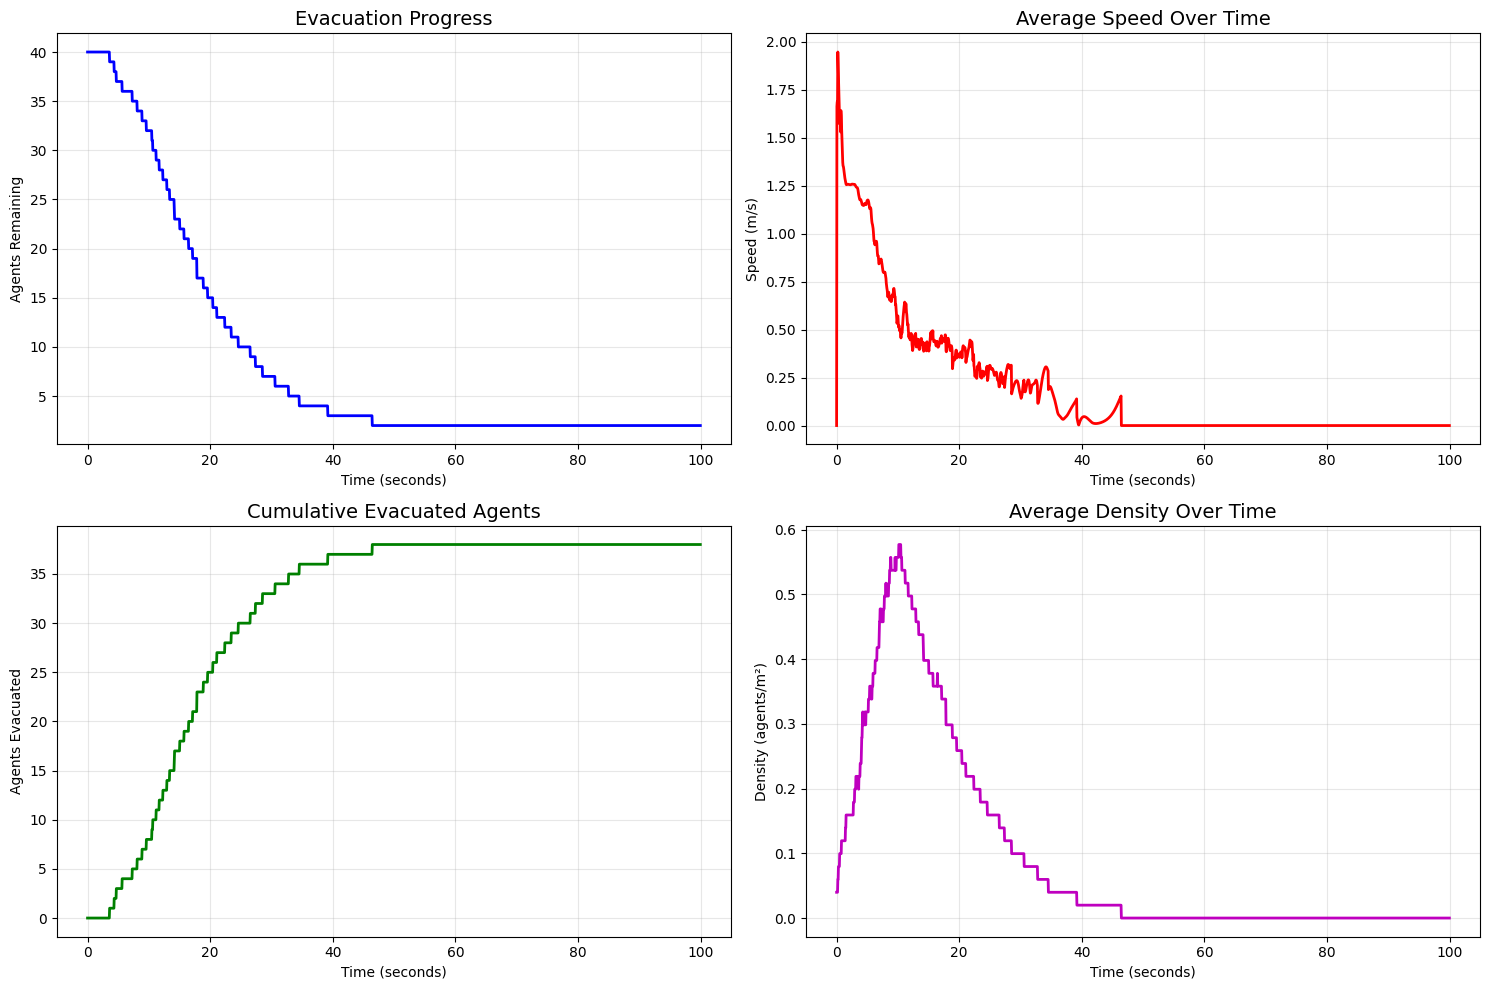

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Agents over time
ax1.plot(model_df.index * 0.05, model_df['Agents'], 'b-', linewidth=2)
ax1.set_title('Evacuation Progress', fontsize=14)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Agents Remaining')
ax1.grid(True, alpha=0.3)

# Average speed over time
ax2.plot(model_df.index * 0.05, model_df['Average_Speed'], 'r-', linewidth=2)
ax2.set_title('Average Speed Over Time', fontsize=14)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Speed (m/s)')
ax2.grid(True, alpha=0.3)

# Exit flow (cumulative)
ax3.plot(model_df.index * 0.05, model_df['Exit_Flow'], 'g-', linewidth=2)
ax3.set_title('Cumulative Evacuated Agents', fontsize=14)
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Agents Evacuated')
ax3.grid(True, alpha=0.3)

# Density over time
ax4.plot(model_df.index * 0.05, model_df['Average_Density'], 'm-', linewidth=2)
ax4.set_title('Average Density Over Time', fontsize=14)
ax4.set_xlabel('Time (seconds)')
ax4.set_ylabel('Density (agents/m²)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Trajectory analysis

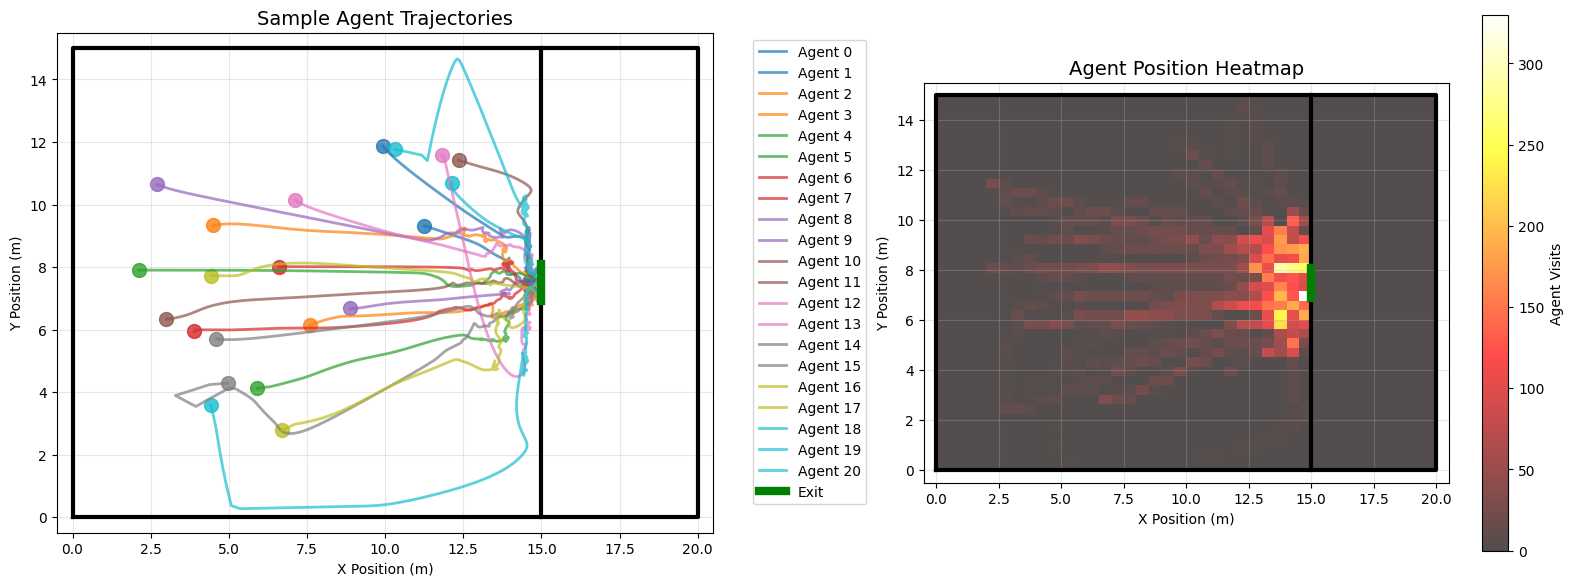

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot sample trajectories
if not agent_df.empty:
    # Here I get 20 unique agents to plot
    sample_agents = agent_df.index.get_level_values('AgentID').unique()[:21]
    colors = plt.cm.tab10(np.linspace(0, 1, len(sample_agents)))
    
    for i, agent_id in enumerate(sample_agents):
        agent_traj = agent_df.xs(agent_id, level='AgentID')
        ax1.plot(agent_traj['x'], agent_traj['y'], 
                color=colors[i], alpha=0.7, linewidth=2, 
                label=f'Agent {agent_id}')
        
        # Mark start and end
        ax1.scatter(agent_traj['x'].iloc[0], agent_traj['y'].iloc[0], 
                   color=colors[i], s=100, marker='o', alpha=0.8)
        ax1.scatter(agent_traj['x'].iloc[-1], agent_traj['y'].iloc[-1], 
                   color=colors[i], s=100, marker='x', alpha=0.8)

# Draw room layout
for ax in [ax1, ax2]:
    # Room boundaries
    ax.plot([0, 20, 20, 0, 0], [0, 0, 15, 15, 0], 'k-', linewidth=3)
    # Central wall
    ax.plot([15, 15], [0, 6.9], 'k-', linewidth=3)
    ax.plot([15, 15], [8.1, 15], 'k-', linewidth=3)
    # Exit
    ax.plot([15, 15], [6.9, 8.1], 'g-', linewidth=6, label='Exit')
    ax.set_xlim(-0.5, 20.5)
    ax.set_ylim(-0.5, 15.5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

ax1.set_title('Sample Agent Trajectories', fontsize=14)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Heat map of agent positions
if not agent_df.empty:
    all_x = agent_df['x'].values
    all_y = agent_df['y'].values
    
    hist, xedges, yedges = np.histogram2d(all_x, all_y, bins=40, 
                                         range=[[0, 20], [0, 15]])
    
    im = ax2.imshow(hist.T, origin='lower', aspect='equal',
                   extent=[0, 20, 0, 15], cmap='hot', alpha=0.7)
    
    plt.colorbar(im, ax=ax2, label='Agent Visits')

ax2.set_title('Agent Position Heatmap', fontsize=14)
ax2.set_xlabel('X Position (m)')
ax1.set_xlabel('X Position (m)')
ax1.set_ylabel('Y Position (m)')
ax2.set_ylabel('Y Position (m)')

plt.tight_layout()
plt.show()